In [1]:
import pandas as pd
import fastjet as fj
import numpy as np
import seaborn as sns
import uproot
import matplotlib.pyplot as plt

In [2]:
tree_Particle = uproot.open("/rstorage/alice/data/LHC18qr/570/LHC18q/000296433/0068/AnalysisResults.root:PWGHF_TreeCreator/tree_Particle")
print(tree_Particle)

<TTree 'tree_Particle' (7 branches) at 0x7f19eb012f98>


In [4]:
tree_Particle.show()


name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run_number           | int32_t                  | AsDtype('>i4')
ev_id                | int32_t                  | AsDtype('>i4')
ev_id_ext            | int32_t                  | AsDtype('>i4')
ev_id_long           | int64_t                  | AsDtype('>i8')
ParticlePt           | float                    | AsDtype('>f4')
ParticleEta          | float                    | AsDtype('>f4')
ParticlePhi          | float                    | AsDtype('>f4')


In [3]:

df_particles = tree_Particle.arrays(["run_number","ev_id","ev_id_ext","ev_id_long","ParticlePt","ParticleEta","ParticlePhi"], library="pd")
print(df_particles)

          run_number       ev_id  ev_id_ext    ev_id_long  ParticlePt  \
0             296433  1235989874         36  155854812530    0.601010   
1             296433  1235989874         36  155854812530    0.582944   
2             296433  1235989874         36  155854812530    0.498061   
3             296433  1235989874         36  155854812530    0.527334   
4             296433  1235989874         36  155854812530    0.792399   
...              ...         ...        ...           ...         ...   
15436000      296433 -1109216741        115  497106989595    0.178962   
15436001      296433 -1109216741        115  497106989595    0.250028   
15436002      296433 -1109216741        115  497106989595    0.411458   
15436003      296433 -1109216741        115  497106989595    0.154624   
15436004      296433 -1109216741        115  497106989595    0.159757   

          ParticleEta  ParticlePhi  
0           -0.668325     3.590327  
1           -0.501000     3.738591  
2           

In [4]:
## group dataframe with the same "ev_id_ext"
df_particles_unique = df_particles.groupby(['run_number', 'ev_id', 'ev_id_ext'])
print(df_particles_unique.head())

          run_number       ev_id  ev_id_ext    ev_id_long  ParticlePt  \
0             296433  1235989874         36  155854812530    0.601010   
1             296433  1235989874         36  155854812530    0.582944   
2             296433  1235989874         36  155854812530    0.498061   
3             296433  1235989874         36  155854812530    0.527334   
4             296433  1235989874         36  155854812530    0.792399   
...              ...         ...        ...           ...         ...   
15433656      296433 -1109216741        115  497106989595    0.628896   
15433657      296433 -1109216741        115  497106989595    0.262138   
15433658      296433 -1109216741        115  497106989595    1.047528   
15433659      296433 -1109216741        115  497106989595    0.288461   
15433660      296433 -1109216741        115  497106989595    0.206997   

          ParticleEta  ParticlePhi  
0           -0.668325     3.590327  
1           -0.501000     3.738591  
2           

<AxesSubplot:xlabel='ParticlePt', ylabel='Count'>

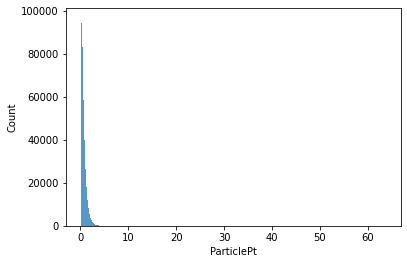

In [5]:
# plt.hist(df_particles_unique.ParticlePt, bins=100, range=(0,1))
# plt.show()
sns.histplot(df_particles.ParticlePt)